Indian startup funding analysis-Exploratory Data Analysis

Project Overview
Goal : Analyze India's startup funding ecosystem through comprehensive EDA to extract actionable business insights for investors,enterpreneurs,and policymakers.

Dataset : Indian Unicorn Startups 2023(102 companies with $1B+ valuations)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [ ]:
df.shape

(102, 8)

Basic Dataset information

In [ ]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


Data Quality Assessment

In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [ ]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


Check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

Basic statistics

In [ ]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


Clean column name

In [ ]:
df.columns=df.columns.str.strip()

convert entry column to datatime

In [ ]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y')
df['Entry_year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_year,int32


Create Valuation growth mertic

In [ ]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


Extract primary city(befor'/)

In [ ]:
df['Primary_city'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth,Primary_city
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


Count number of investors

In [ ]:
df['Investor_count'] = df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth,Primary_city,Investor_count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


Univariate Analysis

Valuation Distribution Analysis

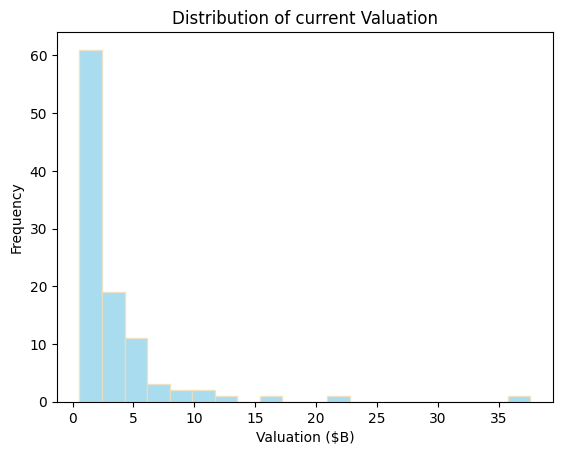

In [ ]:
plt.hist(df['Valuation ($B)'], bins=20, alpha=0.7, color='skyblue', edgecolor='wheat')
plt.title('Distribution of current Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

Sector distribution

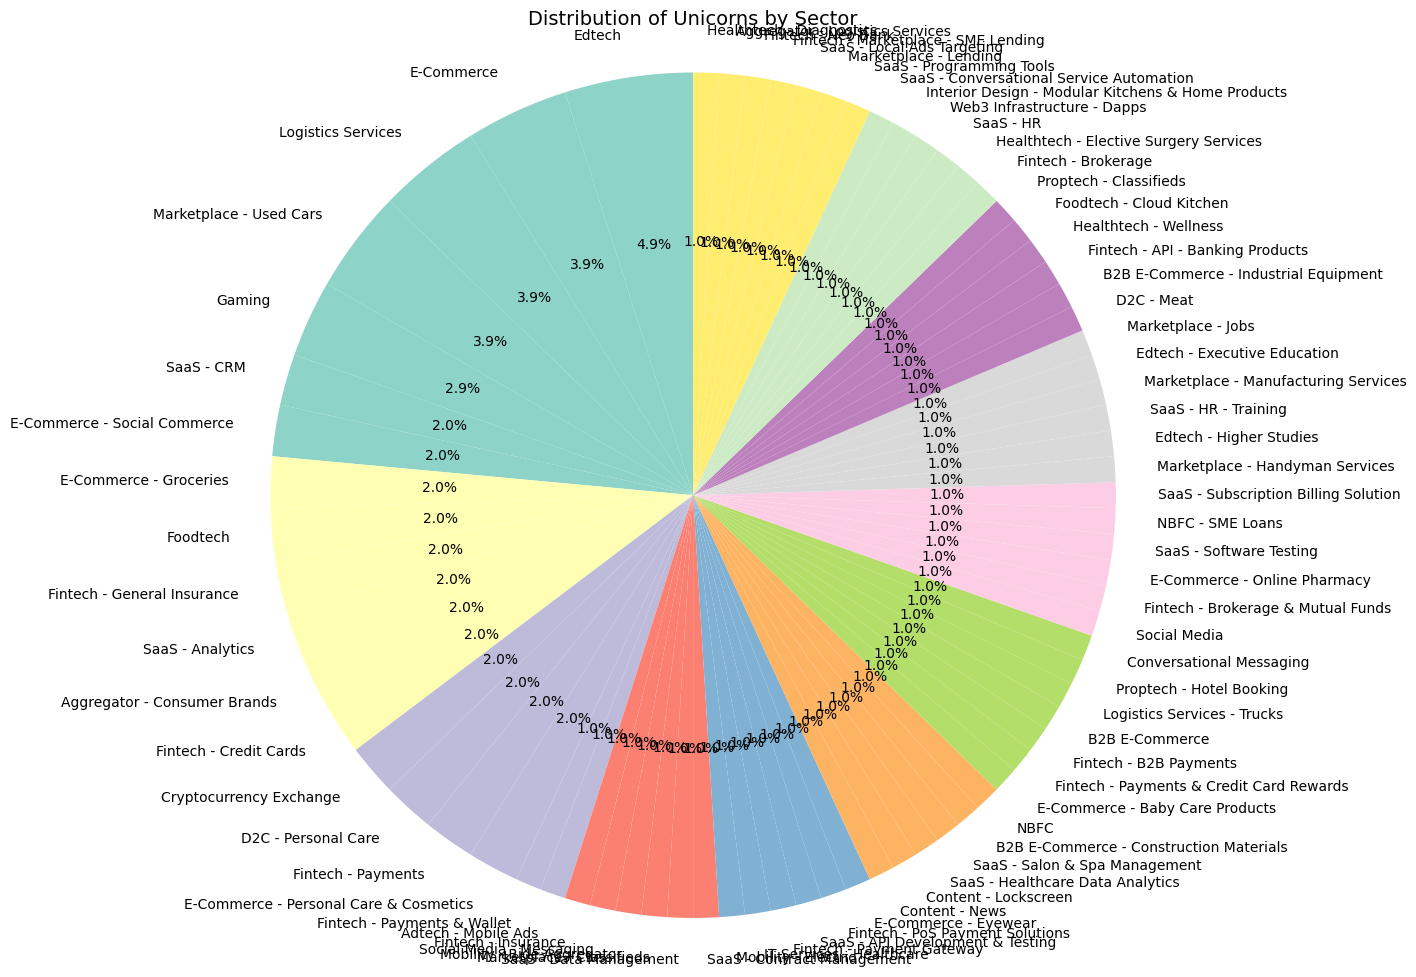

In [ ]:
plt.figure(figsize=(12, 12))

sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(sector_counts)))

plt.pie(sector_counts.values, labels=sector_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unicorns by Sector', fontsize=14, fontweight=2)
plt.axis('equal')
plt.show()

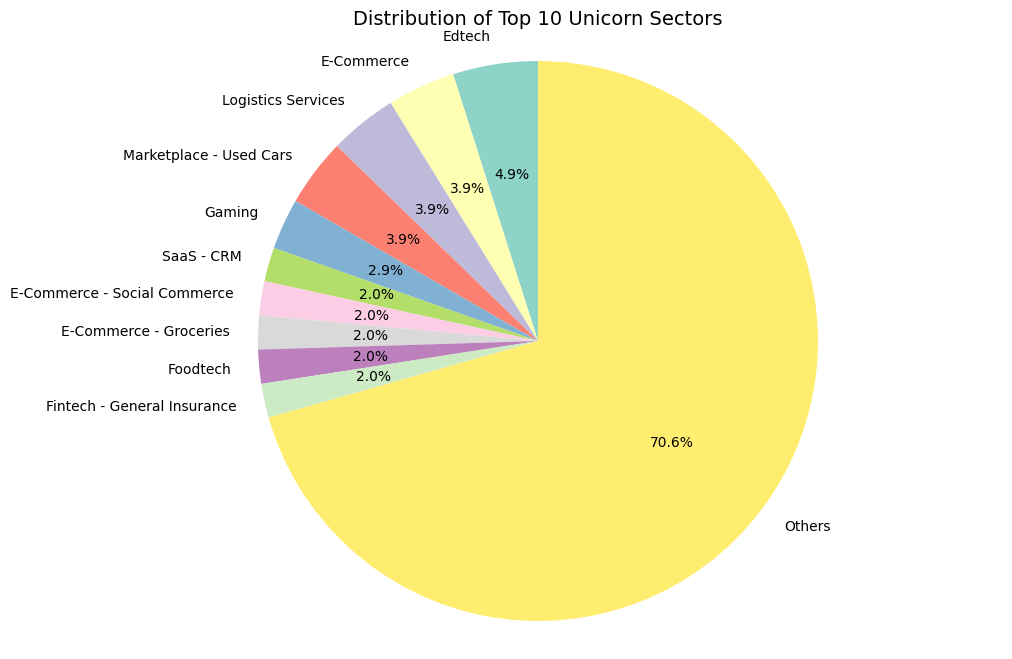

In [ ]:
def display_top_k_sectors(df, k):
  sector_counts = df['Sector'].value_counts()

  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    other_sectors_count = sector_counts.iloc[k:].sum()
    top_sectors['Others'] = other_sectors_count
  else:
    top_sectors = sector_counts

  plt.figure(figsize=(12, 8))
  colors= plt.cm.Set3(np.linspace(0, 1, len(top_sectors)))
  plt.pie(top_sectors.values, labels=top_sectors.index, colors=colors, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn Sectors', fontsize=14, fontweight=2)
  plt.axis('equal')
  plt.show()

display_top_k_sectors(df, 10)

Top Sectors bar chart

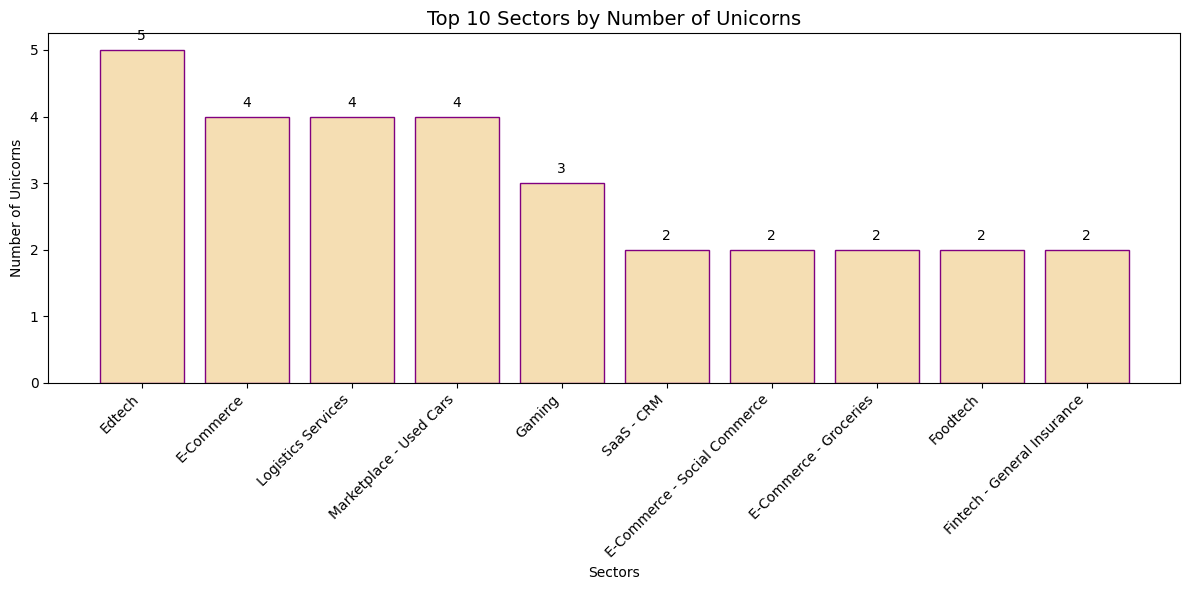

In [ ]:
plt.figure(figsize=(12, 6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)), top_sectors.values, color='wheat', edgecolor='purple')
plt.title('Top 10 Sectors by Number of Unicorns', fontsize=14, fontweight=2)
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)), top_sectors.index, rotation=45, ha='right')
for bar, value in zip(bars, top_sectors.values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Geographic Distribution

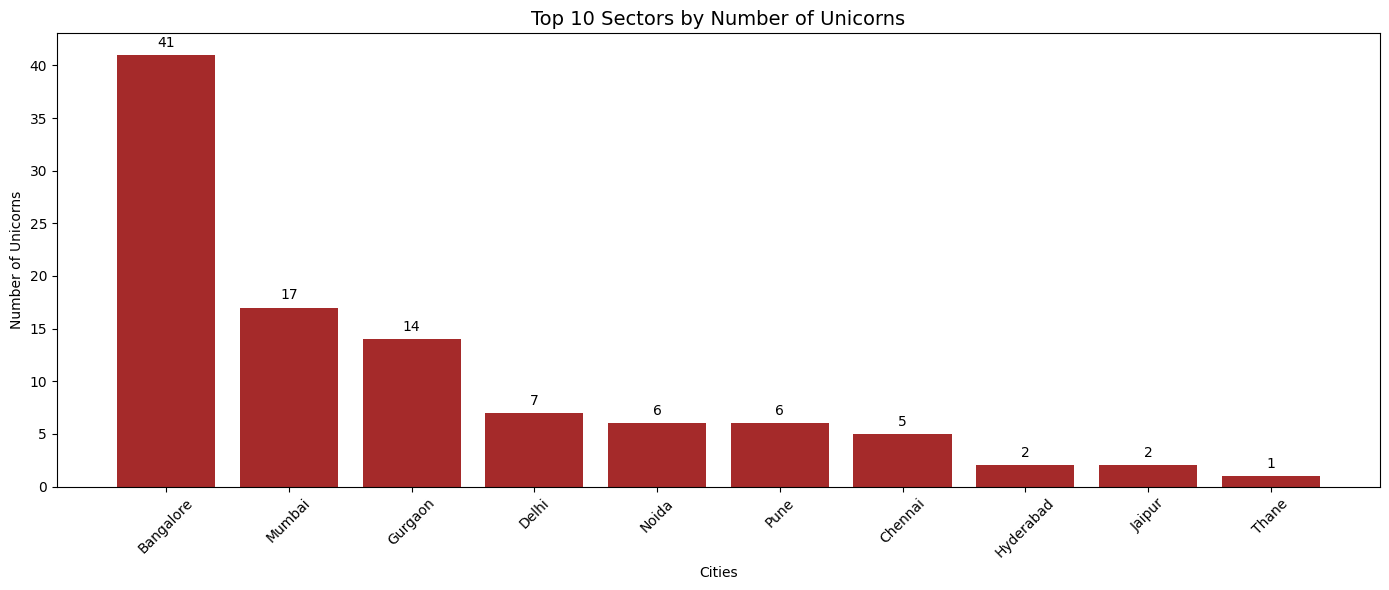

In [ ]:
plt.figure(figsize=(14, 6))

city_counts = df['Primary_city'].value_counts().head(10)
bars = plt.bar(city_counts.index, city_counts.values, color='brown')
plt.title('Top 10 Sectors by Number of Unicorns', fontsize=14, fontweight=2)
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

for bar, value in zip(bars, city_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +0.5, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Create a summary table

In [ ]:
city_summary = df.groupby('Primary_city').agg({
    'Valuation ($B)': ['count', 'sum', 'mean'],
    'Entry_year': ['min', 'max']
}).round(2)
city_summary.columns = ['Count', 'Total_Valuation', 'Avg_Valuation', 'First_Entry', 'Last_Entry']
city_summary.head(10)

,Count,Total_Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_city,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


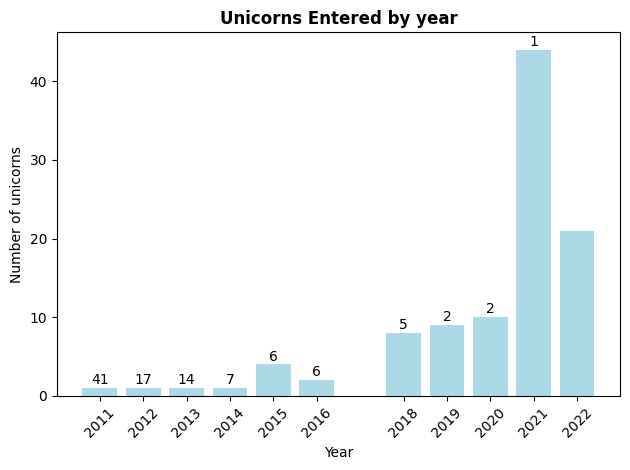

In [ ]:
yearly_entries = df['Entry_year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index, yearly_entries.values, color='lightblue')
plt.title('Unicorns Entered by year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of unicorns')
plt.xticks(yearly_entries.index, rotation=45)

for bar, value in zip(bars, city_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +0.1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Cumulative unicorns

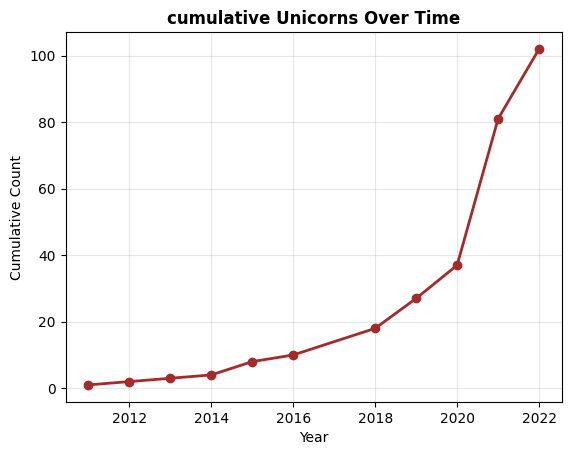

In [ ]:
cumulative = yearly_entries.cumsum()
plt.plot(cumulative.index, cumulative.values, marker='o', linewidth=2, color='brown')
plt.title('cumulative Unicorns Over Time', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True, alpha=0.3)
plt.show()

Average Valuation by year

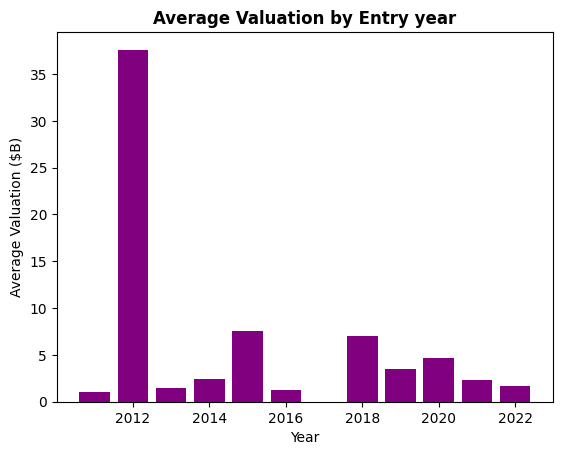

In [ ]:
avg_val_by_year = df.groupby('Entry_year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index, avg_val_by_year.values, color='purple')
plt.title('Average Valuation by Entry year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

In [ ]:
def display_k_sector_evolution(df, k):
  # groupby year and sector count occurrances
  sector_year = df.groupby(['Entry_year', 'Sector']).size().unstack(fill_value=0)
  # select top k sectors based on overall count
  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()

  sector_year = sector_year[top_k_sectors_names]

  plt.figure(figsize=(15, 8))
  sector_year.plot(kind='bar', alpha=0.7, ax=plt.gca())

  plt.title(f'Evoluation of Top {k} Sectors Over Time', fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector', bbox_to_anchor=(1.05,1), loc='upper left')
  plt.yticks(range(0, sector_year.values.max() + 5))
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

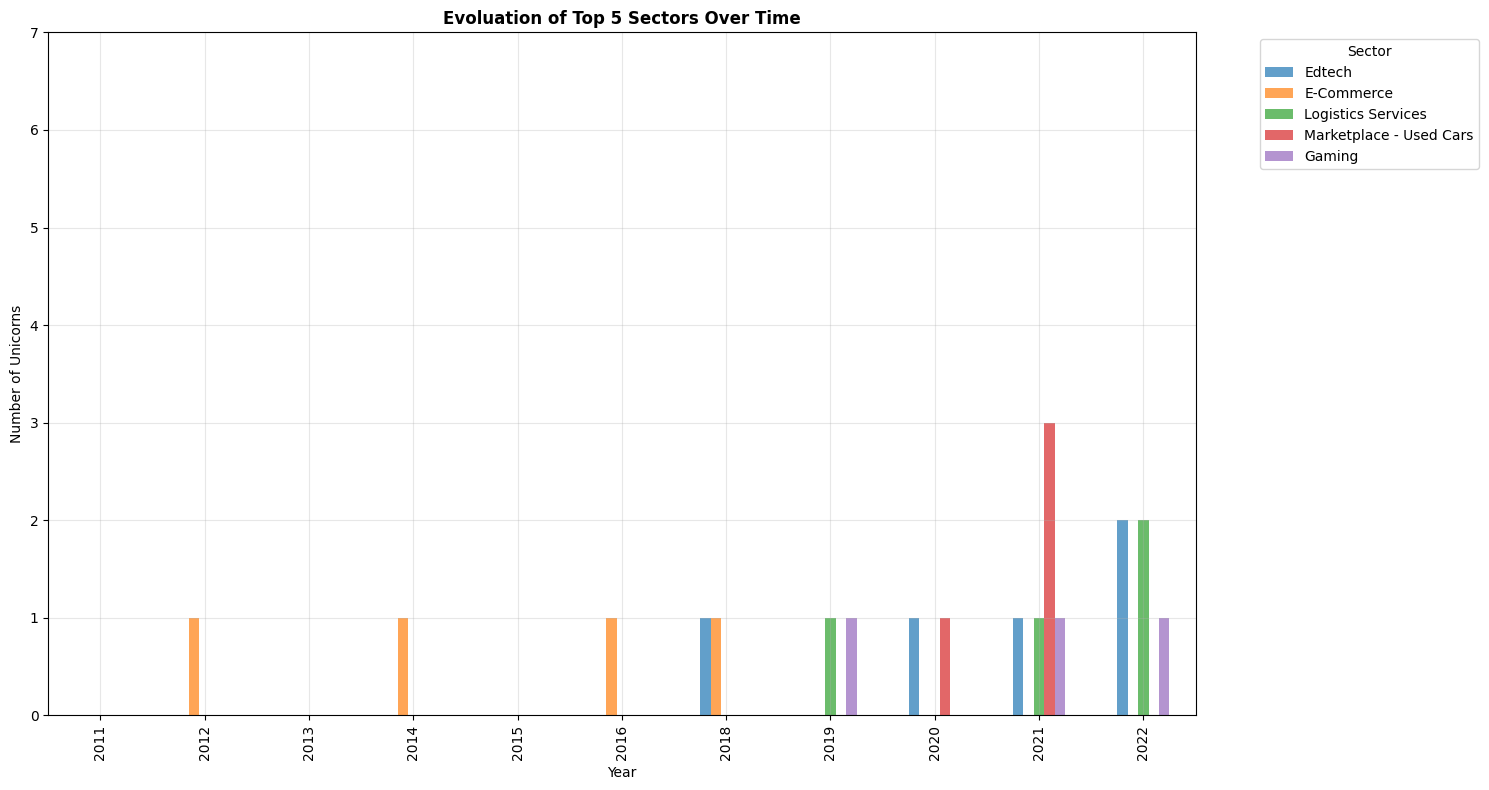

In [ ]:
display_k_sector_evolution(df, 5)

Valuation vs sector analysis

average valuation by sector

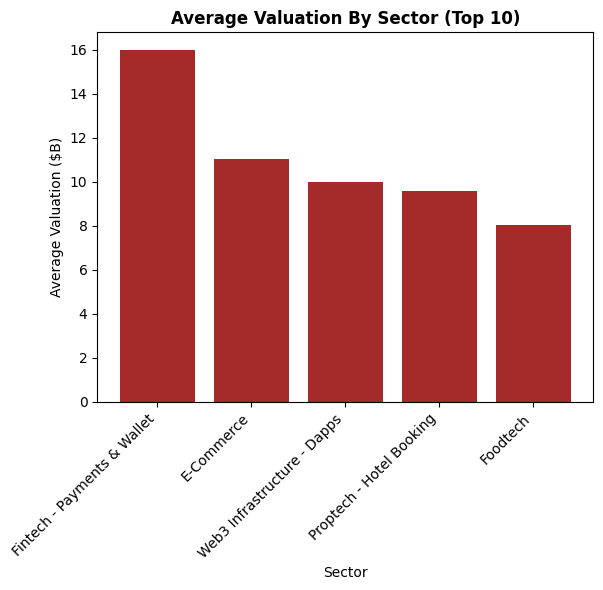

In [ ]:
avg_valuation=df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation=avg_valuation.sort_values(ascending=False).head()


bars=plt.bar(range(len(avg_valuation)),avg_valuation.values,color='brown')

plt.title('Average Valuation By Sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)), avg_valuation.index, rotation=45,ha='right')
plt.show()

Sector vs Count vs Total Valuation

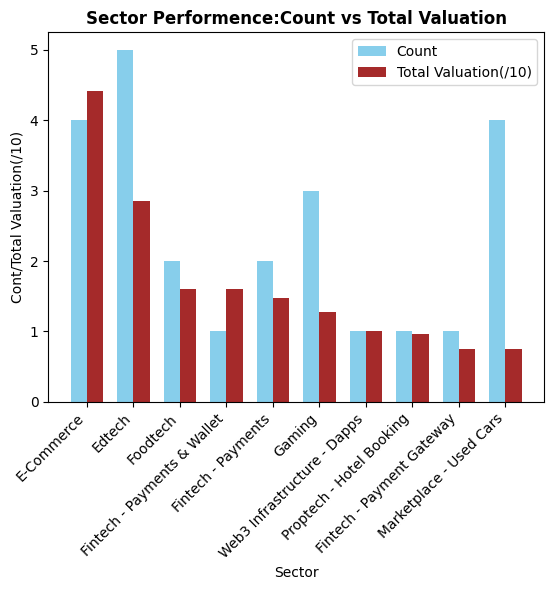

In [ ]:
sector_summary=df.groupby('Sector').agg({
    'Valuation ($B)':['count',sum]
}).round(2)
sector_summary.columns=['Count','Total_Valuation']
sector_summary=sector_summary.sort_values('Total_Valuation',ascending=False).head(10)


x=np.arange(len(sector_summary))
width=0.35

plt.bar(x-width/2,sector_summary['Count'],width,label='Count',color='skyblue')
plt.bar(x+width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation(/10)',color='brown')
plt.title('Sector Performence:Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Cont/Total Valuation(/10)')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

Geographic vs Valuation Analysis

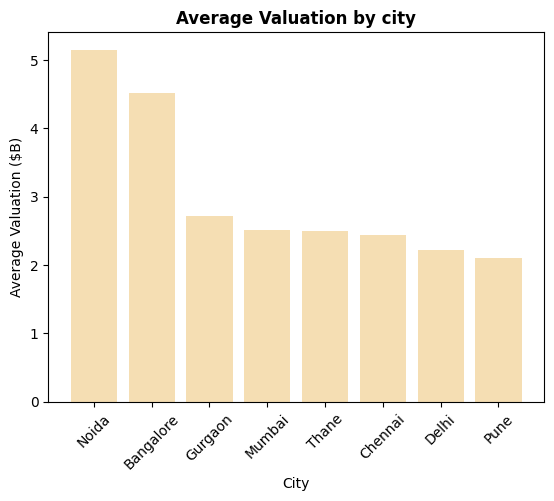

In [ ]:
city_valuation = df.groupby('Primary_city')['Valuation ($B)'].mean()
city_valuation = city_valuation.sort_values(ascending=False).head(8)
bars = plt.bar(city_valuation.index, city_valuation.values, color='wheat')
plt.title('Average Valuation by city', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

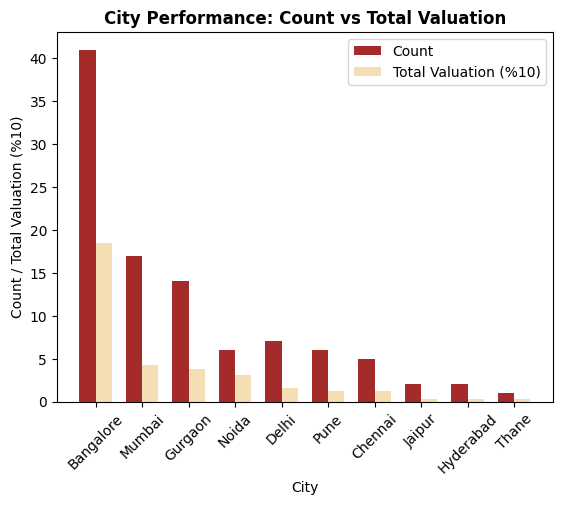

In [ ]:
city_summary=df.groupby('Primary_city').agg({
    'Valuation ($B)':['count','sum']

}).round(2)
city_summary.columns=['Count','Total_Valuation']
city_summary=city_summary.sort_values('Total_Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x - width/2,city_summary['Count'],width,label='Count',color='brown')
plt.bar(x + width/2,city_summary['Total_Valuation']/10,width,label='Total Valuation (%10)',color='wheat')
plt.title('City Performance: Count vs Total Valuation',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count / Total Valuation (%10)')
plt.xticks(x,city_summary.index,rotation=45)
plt.legend()
plt.show()

Number of investors vs valuation

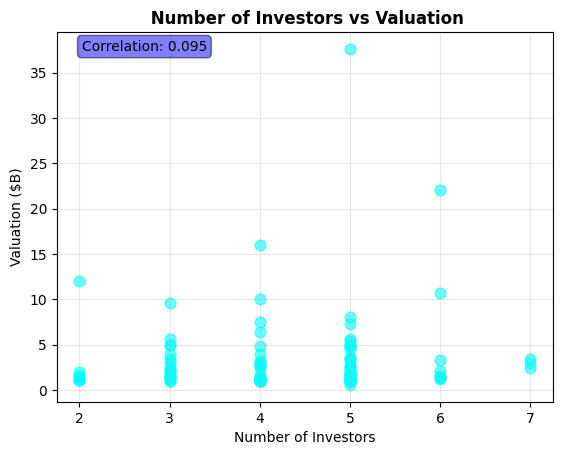

In [ ]:
plt.scatter(df['Investor_count'], df['Valuation ($B)'], alpha=0.6, s=60, color='cyan')
plt.title(' Number of Investors vs Valuation', fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True, alpha=0.3)

correlation = df['Investor_count'].corr(df['Valuation ($B)'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, bbox=dict(boxstyle="round, pad=0.3", facecolor="blue", alpha=0.5))
plt.show()

Most active investors

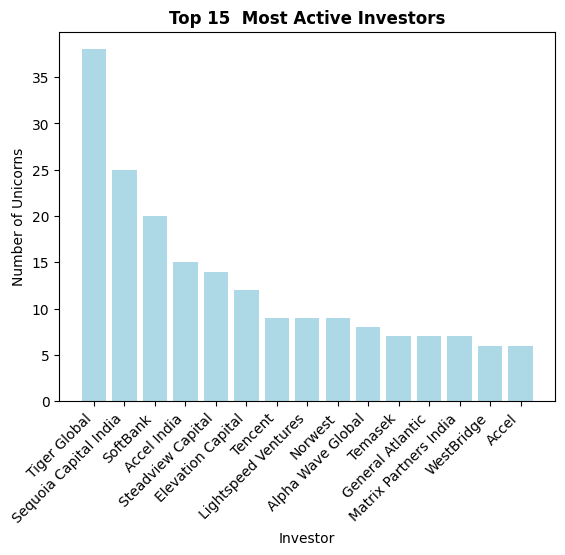

In [ ]:
all_investors=[]
for investors in df['Select Investors'].dropna():
    all_investors.extend(inv.strip() for inv in investors.split(','))

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars=plt.bar(range(len(investor_counts)),investor_counts.values,color='lightblue')
plt.title('Top 15  Most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()

Entry vs investor count

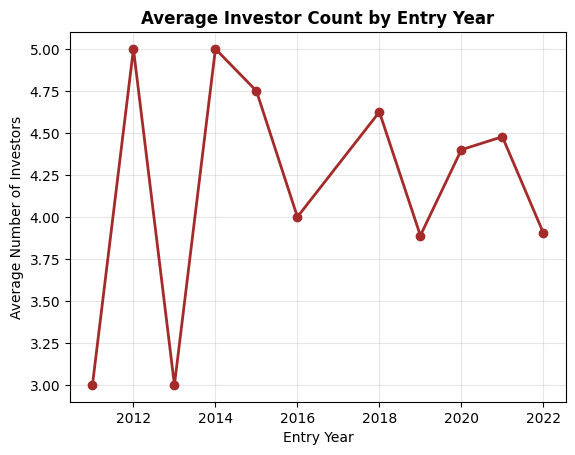

In [ ]:
year_investor = df.groupby('Entry_year')['Investor_count'].mean()
plt.plot(year_investor.index, year_investor.values, marker= 'o', linewidth=2, markersize=6, color='brown')
plt.title('Average Investor Count by Entry Year', fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average Number of Investors')
plt.grid(True, alpha=0.3)
plt.show()

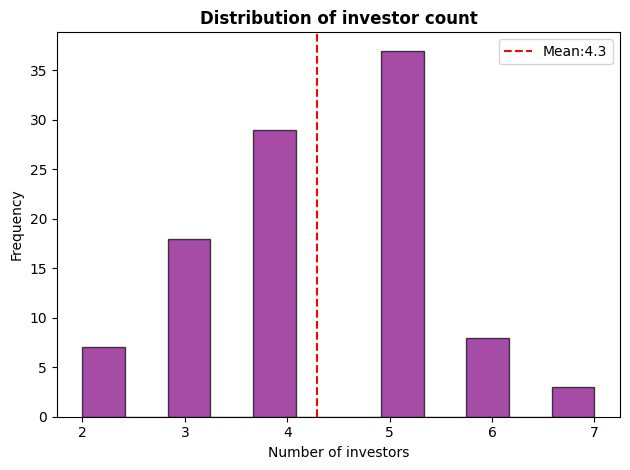

In [ ]:
plt.hist(df['Investor_count'],bins=12,alpha=0.7,color='purple',edgecolor='black')
plt.title('Distribution of investor count',fontweight='bold')
plt.xlabel('Number of investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_count'].mean(),color='red',linestyle='--',label=f'Mean:{df["Investor_count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()